## Trajectory prediction for each dimension separately
### Using SVR Support Vector Regression

#### Read the test data

In [154]:
import pandas as pd

red_ball_fill = pd.read_csv('../data-16-cams/red_ball_coordinates_128px_2024-03-19_17h10m.csv', delimiter=',', decimal='.')
red_ball_fill.isna().sum()


u0       4
v0       4
u1     114
v1     114
u2     251
v2     251
u3     117
v3     117
u4      25
v4      25
u5     112
v5     112
u6     244
v6     244
u7       8
v7       8
u8      23
v8      23
u9      11
v9      11
u10     30
v10     30
u11     29
v11     29
u12    120
v12    120
u13    236
v13    236
u14    117
v14    117
u15     24
v15     24
dtype: int64

#### Split the test data into NaN and non-NaN rows

In [155]:
red_ball_nan_rows = red_ball_fill[red_ball_fill.u2.isna() & red_ball_fill.v2.isna()]
red_ball_nan_rows

,u0,v0,u1,v1,u2,v2,u3,v3,u4,v4,...,u11,v11,u12,v12,u13,v13,u14,v14,u15,v15
0,78.0,38.0,NaN,NaN,NaN,NaN,39.5,86.5,92.0,87.0,...,91.5,51.5,NaN,NaN,NaN,NaN,39.5,84.5,72.5,84.5
1,77.0,38.0,NaN,NaN,NaN,NaN,39.0,87.0,90.0,86.5,...,91.0,51.0,NaN,NaN,NaN,NaN,38.5,83.5,71.0,83.0
2,75.5,37.5,NaN,NaN,NaN,NaN,37.0,86.0,89.0,86.0,...,88.5,50.5,NaN,NaN,NaN,NaN,36.5,83.0,69.5,82.5
3,73.5,37.0,NaN,NaN,NaN,NaN,35.0,85.5,86.0,85.0,...,86.5,49.5,NaN,NaN,NaN,NaN,34.0,83.0,67.0,82.0
4,71.0,37.0,NaN,NaN,NaN,NaN,33.0,85.0,83.5,84.5,...,83.5,49.5,NaN,NaN,NaN,NaN,32.5,82.5,65.0,82.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502,63.0,21.0,124.0,67.0,NaN,NaN,25.0,70.5,77.0,70.0,...,77.0,34.0,125.0,30.0,NaN,NaN,25.0,67.0,58.0,67.0
503,61.0,25.0,121.0,69.5,NaN,NaN,21.5,72.5,75.0,72.0,...,75.0,37.0,122.0,34.0,NaN,NaN,22.0,70.0,55.5,69.5
504,58.0,27.0,118.5,72.5,NaN,NaN,19.5,76.5,73.0,75.0,...,73.0,40.0,119.0,37.0,NaN,NaN,19.5,72.5,53.5,72.5
505,57.0,31.0,116.0,76.0,NaN,NaN,17.0,79.0,70.0,78.0,...,70.0,43.0,116.0,40.0,NaN,NaN,17.0,75.0,51.5,74.5


#### Read the training data

In [156]:
red_ball_all = pd.read_csv('../data-16-cams/red_ball_coordinates_128px_2024-03-19_17h30m.csv', delimiter=',', decimal='.')
red_ball_all_test = pd.read_csv('../data-16-cams/red_ball_coordinates_128px_2024-03-19_17h30m.csv', delimiter=',', decimal='.')
red_ball_all = pd.concat([red_ball_all, red_ball_all_test])
red_ball_non_nan_rows = red_ball_all[~red_ball_all.index.isin(red_ball_nan_rows.index)]
# drop all the rows where u0 and v0 are NaN
red_ball_non_nan_rows = red_ball_non_nan_rows.dropna()
red_ball_non_nan_rows

,u0,v0,u1,v1,u2,v2,u3,v3,u4,v4,...,u11,v11,u12,v12,u13,v13,u14,v14,u15,v15
10,46.5,51.5,102.5,97.5,118.0,98.0,1.0,102.0,57.5,97.5,...,58.5,63.5,102.0,62.0,116.0,62.0,1.0,98.0,38.5,95.5
11,45.5,52.0,102.0,97.5,117.0,99.0,1.0,103.0,57.0,98.0,...,58.5,63.5,101.0,63.0,116.0,63.0,0.5,99.0,38.0,96.0
12,45.0,52.0,101.5,97.5,116.5,99.0,0.5,103.0,56.5,97.5,...,58.0,64.0,100.5,63.5,115.0,63.0,0.0,99.0,37.5,96.0
13,45.0,52.0,101.5,97.5,116.5,98.0,0.0,103.0,56.5,97.5,...,58.0,63.0,101.0,63.0,115.0,63.0,0.0,99.0,37.5,95.5
14,44.5,51.5,101.0,97.0,116.0,97.5,0.0,102.0,56.0,97.5,...,57.5,63.5,100.5,62.5,114.5,62.5,0.0,98.5,36.5,95.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
476,50.0,48.0,107.0,94.0,123.0,94.0,7.0,98.0,62.0,93.5,...,62.5,59.5,106.5,59.0,121.0,58.5,7.0,94.0,43.0,92.0
477,48.0,48.5,105.5,94.0,121.0,95.0,5.0,98.0,60.0,94.0,...,61.0,60.0,105.0,59.0,119.0,59.0,5.0,94.0,41.0,92.0
478,47.0,50.0,105.0,95.5,120.0,96.0,4.0,100.0,59.5,95.5,...,60.5,61.5,104.0,61.0,118.5,61.0,3.0,96.0,40.5,93.5
479,47.0,52.0,104.5,97.0,119.0,98.0,4.0,102.0,59.0,97.0,...,60.0,63.0,103.5,62.0,118.0,62.0,3.0,98.0,40.0,95.0


Training data is u1, v1, u2, v2, ... u6, v6
Test data is u0, v0
The AI model is to predict the NaN values in the test data so the missing values are predicted

In [157]:
X_train = red_ball_non_nan_rows.drop(['u2', 'v2'], axis=1)
y_train = red_ball_non_nan_rows[['u2', 'v2']]
X_test = red_ball_nan_rows.drop(['u2', 'v2'], axis=1)
X_train.shape, y_train.shape, X_test.shape

((274, 30), (274, 2), (251, 30))

In [158]:
from sklearn.impute import KNNImputer

imputer_knn = KNNImputer(n_neighbors=2)
X_train_imputed = imputer_knn.fit_transform(X_train)
X_test_imputed = imputer_knn.fit_transform(X_test)
X_test_imputed = pd.DataFrame(X_test_imputed, columns=X_test.columns)

#### Train the models

In [159]:
from sklearn.svm import SVR

X_train_imputed = pd.DataFrame(X_train_imputed, columns=X_test.columns)

model_x = SVR()
model_x.fit(X_train_imputed, y_train.u2)

SVR()

In [160]:
model_y = SVR()
model_y.fit(X_train_imputed, y_train.v2)

SVR()

#### Make predictions

In [161]:
X_test_imputed

,u0,v0,u1,v1,u3,v3,u4,v4,u5,v5,...,u11,v11,u12,v12,u13,v13,u14,v14,u15,v15
0,78.0,38.0,126.75,88.50,39.5,86.5,92.0,87.0,126.75,92.75,...,91.5,51.5,126.25,50.75,127.0,50.75,39.5,84.5,72.5,84.5
1,77.0,38.0,126.75,88.50,39.0,87.0,90.0,86.5,126.75,92.75,...,91.0,51.0,126.25,50.75,127.0,50.75,38.5,83.5,71.0,83.0
2,75.5,37.5,126.75,88.50,37.0,86.0,89.0,86.0,126.75,92.75,...,88.5,50.5,126.25,50.75,127.0,50.75,36.5,83.0,69.5,82.5
3,73.5,37.0,126.25,86.25,35.0,85.5,86.0,85.0,126.25,90.25,...,86.5,49.5,126.25,50.75,127.0,50.75,34.0,83.0,67.0,82.0
4,71.0,37.0,126.00,83.50,33.0,85.0,83.5,84.5,125.75,86.75,...,83.5,49.5,125.75,48.75,127.0,50.75,32.5,82.5,65.0,82.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246,63.0,21.0,124.00,67.00,25.0,70.5,77.0,70.0,123.50,70.50,...,77.0,34.0,125.00,30.00,127.0,46.50,25.0,67.0,58.0,67.0
247,61.0,25.0,121.00,69.50,21.5,72.5,75.0,72.0,121.50,72.50,...,75.0,37.0,122.00,34.00,127.0,46.50,22.0,70.0,55.5,69.5
248,58.0,27.0,118.50,72.50,19.5,76.5,73.0,75.0,118.00,76.00,...,73.0,40.0,119.00,37.00,127.0,46.50,19.5,72.5,53.5,72.5
249,57.0,31.0,116.00,76.00,17.0,79.0,70.0,78.0,115.50,78.50,...,70.0,43.0,116.00,40.00,127.0,50.75,17.0,75.0,51.5,74.5


In [162]:
y_pred_x = model_x.predict(X_test_imputed)

In [163]:
y_pred_y = model_y.predict(X_test_imputed)

#### Plot the imputed values

In [164]:
nan_order = red_ball_nan_rows.index.values
non_nan_order = red_ball_fill.index.values

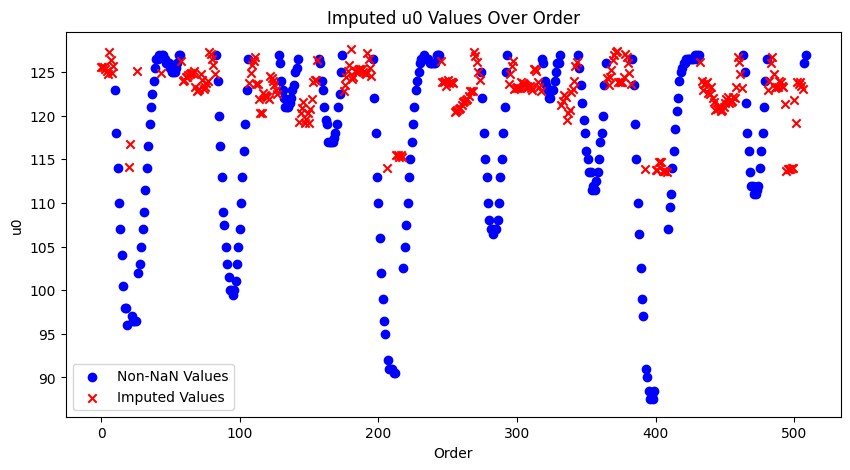

In [165]:
from matplotlib import pyplot as plt

plt.figure(figsize=(10, 5))
plt.scatter(non_nan_order, red_ball_fill.u2, color='blue', label='Non-NaN Values')
plt.scatter(nan_order, y_pred_x, color='red', marker='x', label='Imputed Values')
plt.xlabel('Order')
plt.ylabel('u0')
plt.title('Imputed u0 Values Over Order')
plt.legend()
plt.show()


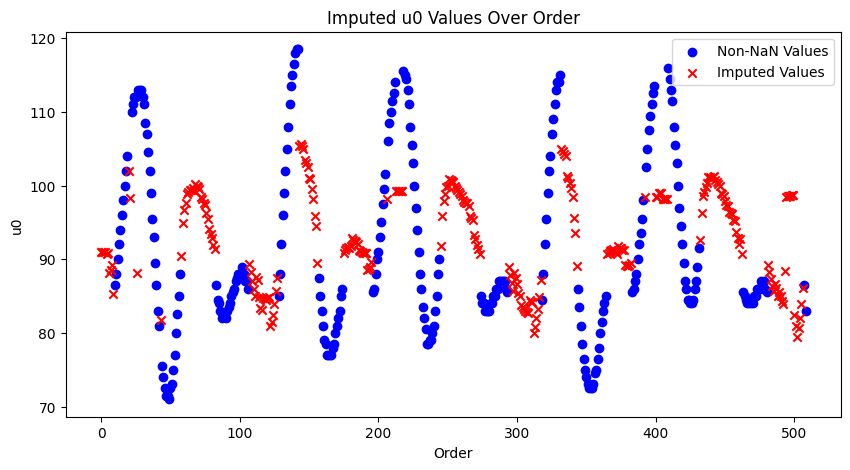

In [166]:
from matplotlib import pyplot as plt

plt.figure(figsize=(10, 5))
plt.scatter(non_nan_order, red_ball_fill.v2, color='blue', label='Non-NaN Values')
plt.scatter(nan_order, y_pred_y, color='red', marker='x', label='Imputed Values')
plt.xlabel('Order')
plt.ylabel('u0')
plt.title('Imputed u0 Values Over Order')
plt.legend()
plt.show()


In [167]:
import numpy as np
y_pred = np.column_stack((y_pred_x, y_pred_y))

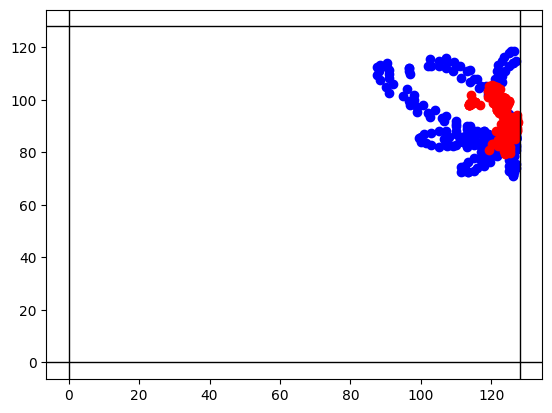

In [171]:
import matplotlib.pyplot as plt

# make a 2d plot with the old values in blue and the new in red
plt.scatter(red_ball_fill.u2, red_ball_fill.v2, color='blue')
plt.scatter(y_pred[:, 0], y_pred[:, 1], color='red')
plt.axvline(x=128, color='black', linewidth=1, label='Screen Boundary')
plt.axhline(y=128, color='black', linewidth=1)
plt.axvline(x=0, color='black', linewidth=1, label='Screen Boundary')
plt.axhline(y=0, color='black', linewidth=1)
plt.show()